# Project Name: ***Mental Fitness Tracker***


## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Validation libraries
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import ExtraTreesClassifier

In [4]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

### Ignoring the Warnings

In [5]:
import warnings
warnings.filterwarnings("ignore")

## Importing the Data

In [6]:
dataset = pd.read_csv('/content/Mental_Fitness_data.csv')

In [7]:
dataset

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


## Analyzing the Dataset

In [8]:
dataset.shape

(1259, 27)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [10]:
dataset.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


## Data cleaning

In [11]:
total = dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)

In [12]:
missing_data = pd.concat([total, percent], axis=1, keys=['Total Value', 'Percent'])
missing_data

,Total Value,Percent
comments,1095,0.869738
state,515,0.409055
work_interfere,264,0.209690
self_employed,18,0.014297
seek_help,0,0.000000
obs_consequence,0,0.000000
mental_vs_physical,0,0.000000
phys_health_interview,0,0.000000
mental_health_interview,0,0.000000
supervisor,0,0.000000


In [13]:
dataset = dataset.drop(['comments', 'state', 'Timestamp'], axis= 1)
dataset.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [14]:
feature_types = {}
for column in dataset.columns:
    data_type = dataset[column].dtype
    if data_type == 'int64':
        feature_types[column] = 'int'
    elif data_type == 'float64':
        feature_types[column] = 'float'
    elif data_type == 'object':
        feature_types[column] = 'str'

print(feature_types)

{'Age': 'int', 'Gender': 'str', 'Country': 'str', 'self_employed': 'str', 'family_history': 'str', 'treatment': 'str', 'work_interfere': 'str', 'no_employees': 'str', 'remote_work': 'str', 'tech_company': 'str', 'benefits': 'str', 'care_options': 'str', 'wellness_program': 'str', 'seek_help': 'str', 'anonymity': 'str', 'leave': 'str', 'mental_health_consequence': 'str', 'phys_health_consequence': 'str', 'coworkers': 'str', 'supervisor': 'str', 'mental_health_interview': 'str', 'phys_health_interview': 'str', 'mental_vs_physical': 'str', 'obs_consequence': 'str'}


In [15]:
default_values = {
    'int': 0,
    'string': 'NaN',
    'float': 0.0
}

feature_types = {
    'Age': 'int',
    'Gender': 'string',
    'Country': 'string',
    'self_employed': 'string',
    'family_history': 'string',
    'treatment': 'string',
    'work_interfere': 'string',
    'no_employees': 'string',
    'remote_work': 'string',
    'tech_company': 'string',
    'anonymity': 'string',
    'leave': 'string',
    'mental_health_consequence': 'string',
    'phys_health_consequence': 'string',
    'coworkers': 'string',
    'supervisor': 'string',
    'mental_health_interview': 'string',
    'phys_health_interview': 'string',
    'mental_vs_physical': 'string',
    'obs_consequence': 'string',
    'benefits': 'string',
    'care_options': 'string',
    'wellness_program': 'string',
    'seek_help': 'string'
}

for feature in dataset:
    data_type = feature_types.get(feature)
    default_value = default_values.get(data_type)

    if data_type and default_value is not None:
        dataset[feature] = dataset[feature].fillna(default_value)
    else:
        print(f'Error: Feature {feature} not recognized.')

dataset.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [16]:
gender = dataset['Gender'].unique()
print(gender)

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


In [17]:
gender = dataset['Gender'].str.lower()

male = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
female = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]
other = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]

for (row, col) in dataset.iterrows():

    if str.lower(col.Gender) in male:
        dataset['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female:
        dataset['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in other:
        dataset['Gender'].replace(to_replace=col.Gender, value='other', inplace=True)

stk_list = ['A little about you', 'p']
dataset = dataset[~dataset['Gender'].isin(stk_list)]

print(dataset['Gender'].unique())

['female' 'male' 'other']


In [18]:
dataset['Age'].fillna(dataset['Age'].median(), inplace=True)
dataset.loc[dataset['Age'] < 18, 'Age'] = dataset['Age'].median()
dataset.loc[dataset['Age'] > 120, 'Age'] = dataset['Age'].median()
dataset['age_range'] = pd.cut(dataset['Age'], [0, 20, 30, 65, 100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

In [19]:
dataset['self_employed'].fillna('No', inplace=True)
dataset['self_employed'].replace('NaN', 'No', inplace=True)
print(dataset['self_employed'].unique())

['No' 'Yes']


In [20]:
dataset['work_interfere'] = dataset['work_interfere'].replace(['NaN'], "Don't know" )
print(dataset['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


## Encoding the data


In [21]:
labelDict = {}
for feature in dataset.columns:
    if dataset[feature].dtype == 'object':
        le = preprocessing.LabelEncoder()
        dataset[feature] = le.fit_transform(dataset[feature])
        labelKey = 'label_' + feature
        labelValue = list(le.classes_)
        labelDict[labelKey] = labelValue

for key, value in labelDict.items():
    print(key, value)

dataset = dataset.drop(['Country'], axis=1)
dataset.head()

label_Gender ['female', 'male', 'other']
label_Country ['Australia', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'United Kingdom', 'United States', 'Uruguay', 'Zimbabwe']
label_self_employed ['No', 'Yes']
label_family_history ['No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ["Don't know", 'Never', 'Often', 'Rarely', 'Sometimes']
label_no_employees ['1-5', '100-500', '26-100', '500-1000', '6-25', 'More than 1000']
label_remote_work ['No', 'Yes']
label_tech_company ['No', 'Yes']
label_benefits ["Don't know", 'No', 'Yes']
label_car

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,37,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,31-65
1,44,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,31-65
2,32,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,31-65
3,31,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,31-65
4,31,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,31-65


In [22]:
total = dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total  Percent
Age                            0      0.0
Gender                         0      0.0
obs_consequence                0      0.0
mental_vs_physical             0      0.0
phys_health_interview          0      0.0
mental_health_interview        0      0.0
supervisor                     0      0.0
coworkers                      0      0.0
phys_health_consequence        0      0.0
mental_health_consequence      0      0.0
leave                          0      0.0
anonymity                      0      0.0
seek_help                      0      0.0
wellness_program               0      0.0
care_options                   0      0.0
benefits                       0      0.0
tech_company                   0      0.0
remote_work                    0      0.0
no_employees                   0      0.0
work_interfere                 0      0.0
treatment                      0      0.0
family_history                 0      0.0
self_employed                  0  

## Correlation Matrix

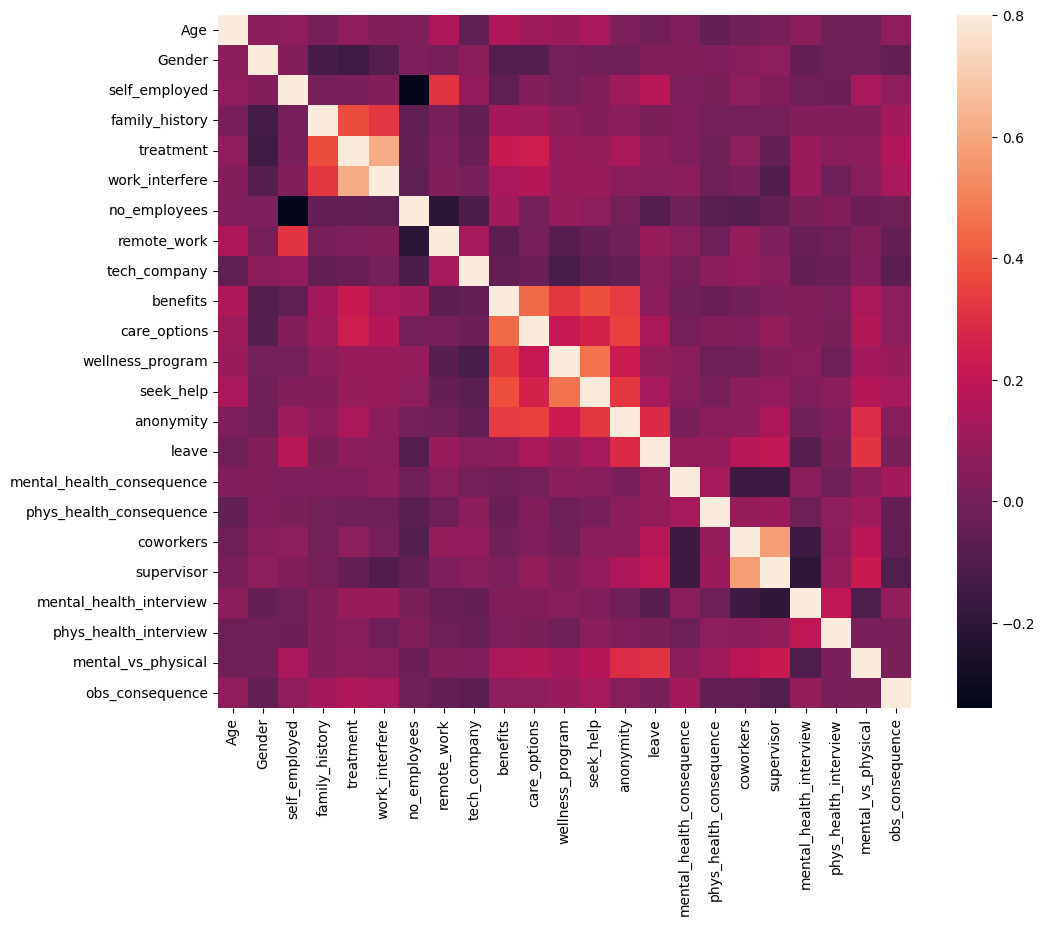

In [23]:
corrmat = dataset.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

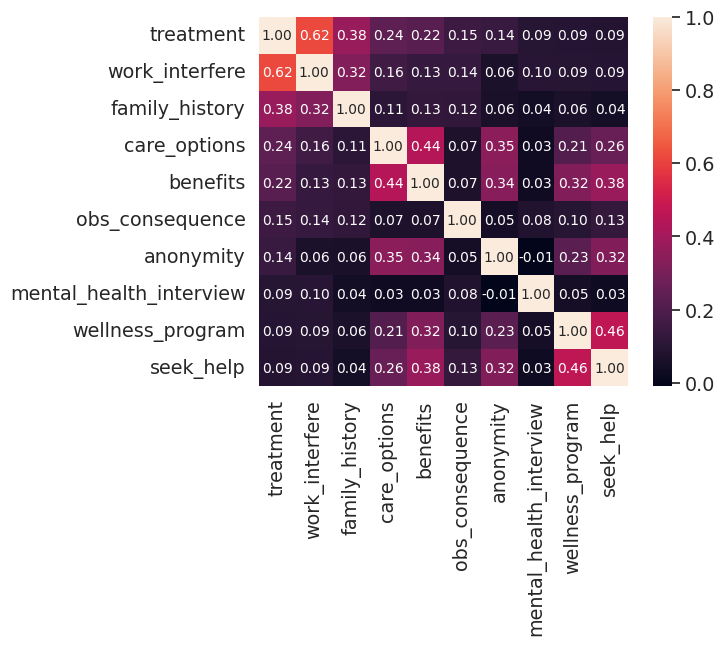

In [24]:
k = 10
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(dataset[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Charts to see relationship between the data

Text(0.5, 0, 'Age')

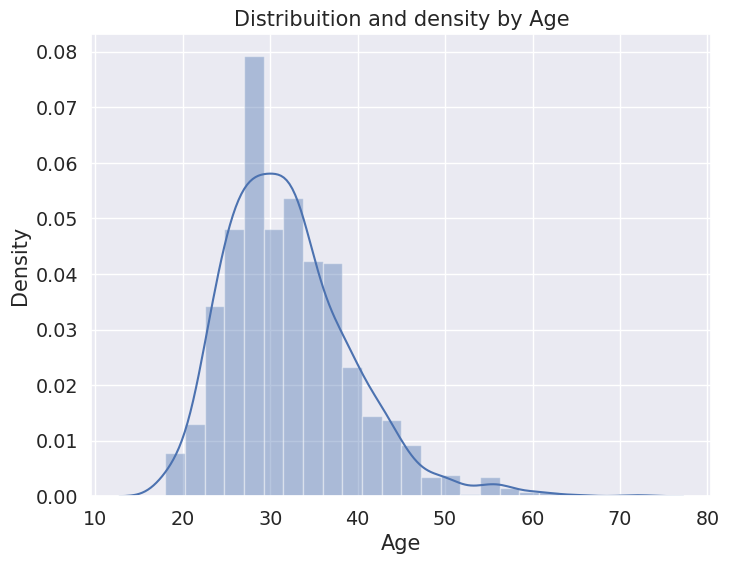

In [25]:
plt.figure(figsize=(8,6))
sns.distplot(dataset["Age"], bins=24)
plt.title("Distribuition and density by Age")
plt.xlabel("Age")

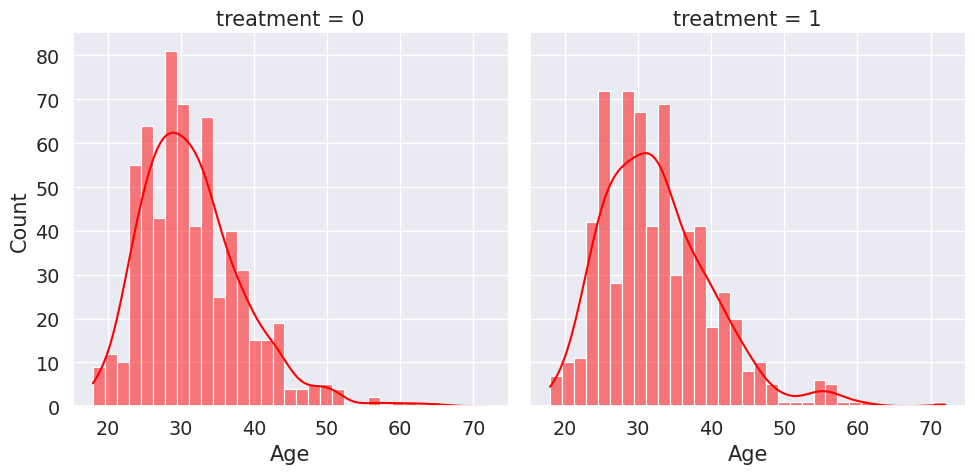

In [26]:
sns.displot(data=dataset, x="Age", col="treatment", kde=True, height=5, color = 'red')

Text(0.5, 1.0, 'Total Distribution by treated or not')

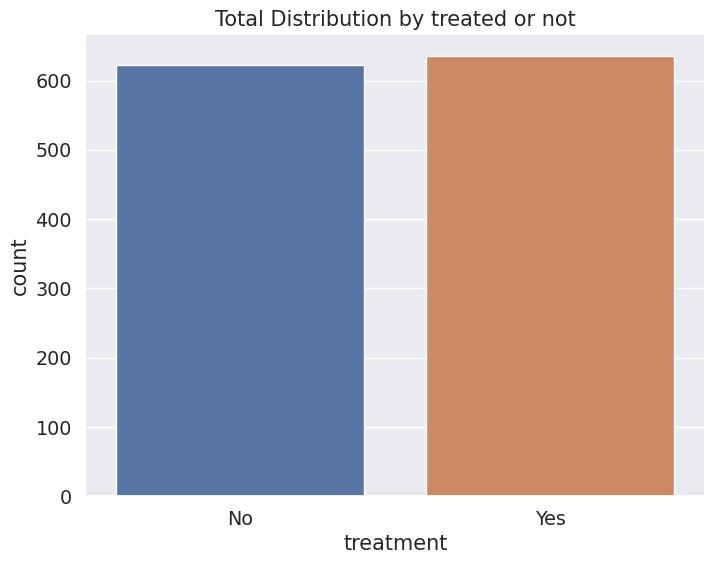

In [27]:
plt.figure(figsize=(8, 6))
labels = labelDict['label_treatment']
sns.countplot(x="treatment", data=dataset)
plt.xticks(ticks=[0, 1], labels=labels[:2])
plt.title('Total Distribution by treated or not')

<Figure size 1200x800 with 0 Axes>

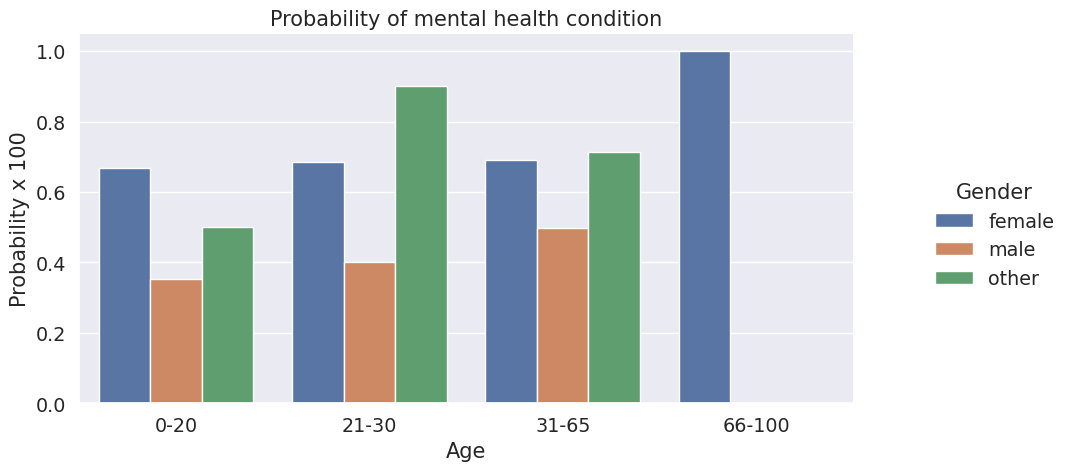

In [28]:
plt.figure(figsize=(12, 8))
labels = ['0-20', '21-30', '31-65', '66-100']

g = sns.catplot(x="age_range", y="treatment", hue="Gender", data=dataset, kind="bar", ci=None, height=5, aspect=2, legend_out=True)
g.set_xticklabels(labels)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Age')
new_labels = labelDict['label_Gender']
g._legend.set_title('Gender')
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

g.fig.subplots_adjust(top=0.9, right=0.8)
plt.show()

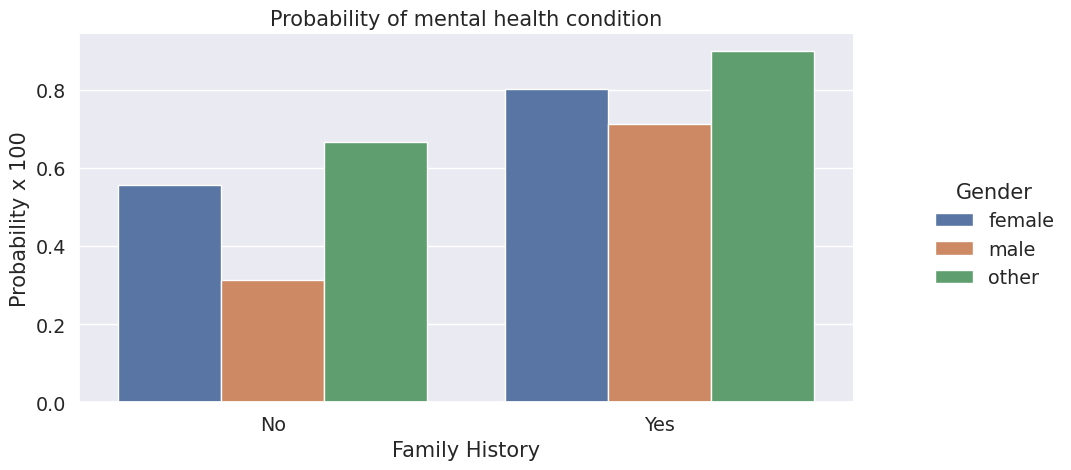

In [29]:
family_history_labels = labelDict['label_family_history']

g = sns.catplot(x="family_history", y="treatment", hue="Gender", data=dataset, kind="bar", ci=None, height=5, aspect=2, legend_out=True)
g.set_xticklabels(family_history_labels)

plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Family History')

gender_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, gender_labels):
    t.set_text(l)

g.fig.subplots_adjust(top=0.9, right=0.8)
plt.show()

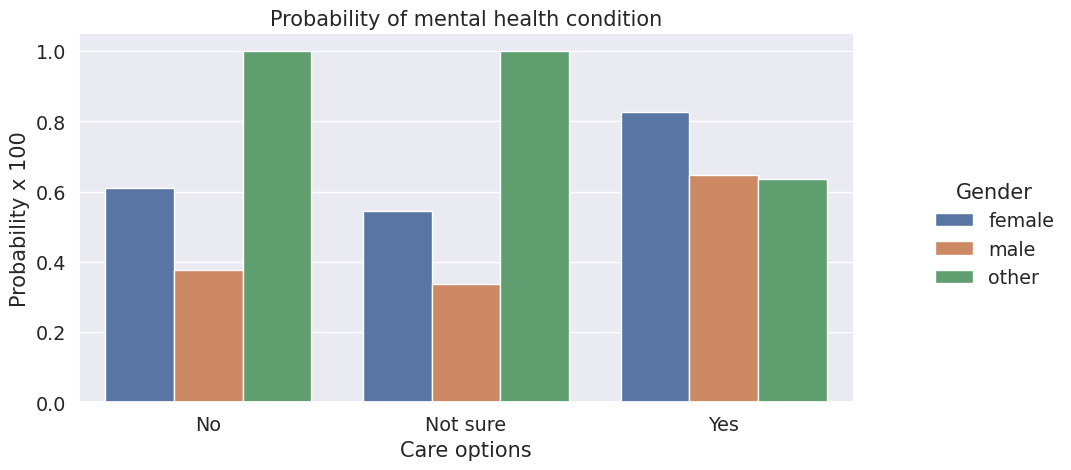

In [30]:
o = labelDict['label_care_options']
g = sns.catplot(x="care_options", y="treatment", hue="Gender", data=dataset, kind="bar", ci=None, height=5, aspect=2, legend_out = True)
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Care options')

new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

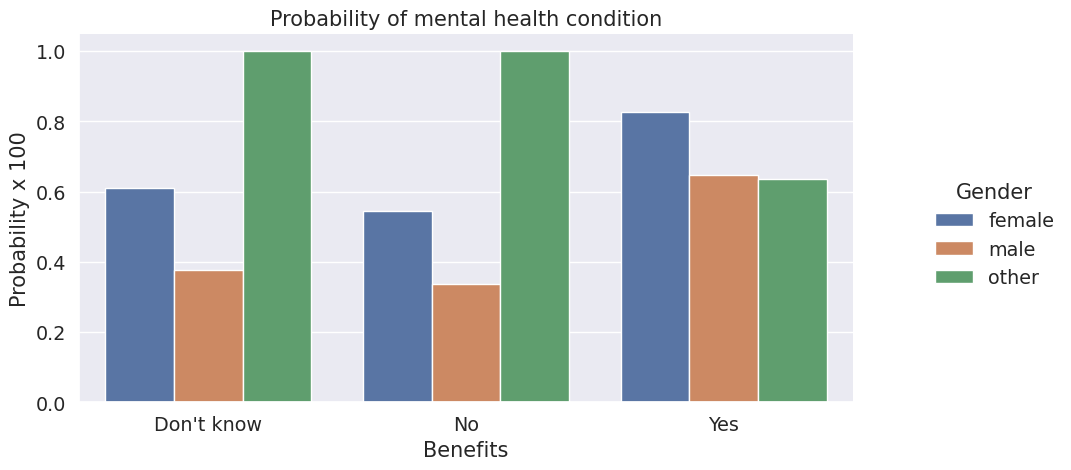

In [31]:
o = labelDict['label_benefits']
g = sns.catplot(x="care_options", y="treatment", hue="Gender", data=dataset, kind="bar", ci=None, height=5, aspect=2, legend_out = True)
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Benefits')

new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

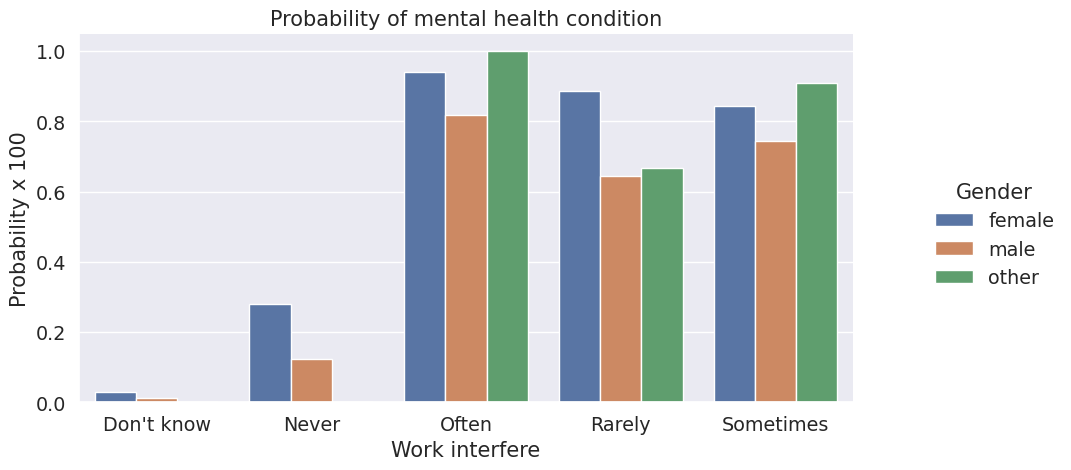

In [32]:
o = labelDict['label_work_interfere']
g = sns.catplot(x="work_interfere", y="treatment", hue="Gender", data=dataset, kind="bar", ci=None, height=5, aspect=2, legend_out = True)
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Work interfere')

new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

## Scaling and Fitting

In [33]:
scaler = MinMaxScaler()
dataset['Age'] = scaler.fit_transform(dataset[['Age']])
dataset.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,0.351852,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,31-65
1,0.481481,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,31-65
2,0.259259,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,31-65
3,0.240741,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,31-65
4,0.240741,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,31-65


In [34]:
feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
X = dataset[feature_cols]
y = dataset.treatment

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

methodDict = {}
rmseDict = ()

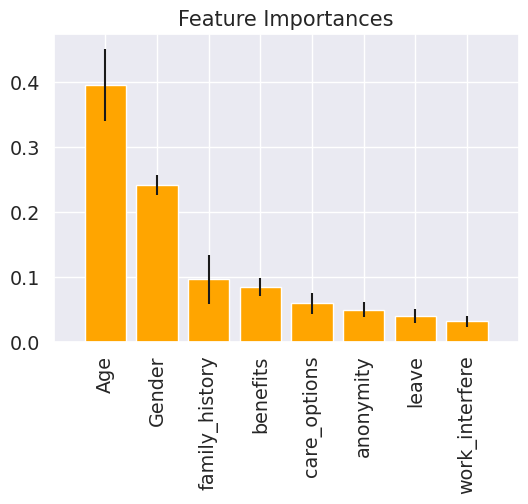

In [35]:
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(X, y)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

indices = np.argsort(importances)[::-1]

labels = [feature_cols[f] for f in range(X.shape[1])]

plt.figure(figsize=(6, 4))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color="orange", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), labels, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

In [36]:
def evalClassModel(model, y_test, y_pred_class, plot=False):
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('Accuracy:', accuracy)

    print('Null accuracy:\n', y_test.value_counts())

    print('Percentage of ones:', y_test.mean())
    print('Percentage of zeros:', 1 - y_test.mean())

    print('True:', y_test.values[0:25])
    print('Pred:', y_pred_class[0:25])

    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]

    sns.heatmap(confusion, annot=True, fmt="d")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print('Classification Accuracy:', accuracy)
    print('Classification Error:', 1 - accuracy)
    print('False Positive Rate:', FP / float(TN + FP))
    print('Precision:', metrics.precision_score(y_test, y_pred_class))
    print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_class))
    print('Cross-validated AUC:', cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean())

    print('First 10 predicted responses:\n', model.predict(X_test)[0:10])
    print('First 10 predicted probabilities of class members:\n', model.predict_proba(X_test)[0:10])
    print('First 10 predicted probabilities:\n', y_pred_prob[0:10])

    if plot:
        plt.rcParams['font.size'] = 12
        plt.hist(y_pred_prob, bins=8)
        plt.xlim(0, 1)
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of treatment')
        plt.ylabel('Frequency')
        plt.show()

    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    if plot:
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for treatment classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()

    def evaluate_threshold(threshold):
        print('Specificity for ' + str(threshold) + ' :', 1 - fpr[thresholds > threshold][-1])

    predict_mine = np.where(y_pred_prob > 0.50, 1, 0)
    confusion = metrics.confusion_matrix(y_test, predict_mine)
    print(confusion)

    return accuracy

In [37]:
def tuningCV(knn):
    k_range = list(range(1, 31))
    k_scores = []

    for k in k_range:
        knn = hborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
        k_scores.append(scores.mean())

    plt.plot(k_range, k_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()

In [38]:
def tuningGridSearch(knn):
    k_range = list(range(1, 31))

    param_grid = dict(n_neighbors=k_range)

    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

    grid.fit(X, y)

    grid.grid_scores_

    print(grid.grid_scores_[0].parameters)
    print(grid.grid_scores_[0].cv_validation_scores)
    print(grid.grid_scores_[0].mean_validation_score)

    grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]

    plt.plot(k_range, grid_mean_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()

    print('GridSearch best score', grid.best_score_)
    print('GridSearch best params', grid.best_params_)
    print('GridSearch best estimator', grid.best_estimator_)

In [39]:
def tuningRandomizedSearchCV(model, param_dist):
    rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
    rand.fit(X, y)
    print('Rand. Best Score:', rand.best_score_)
    print('Rand. Best Params:', rand.best_params_)
    best_scores = []
    for _ in range(20):
        rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10)
        rand.fit(X, y)
        best_scores.append(round(rand.best_score_, 3))
    print(best_scores)

In [40]:
def tuningMultParam(knn):
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']
    param_grid = dict(n_neighbors=k_range, weights=weight_options)
    print(param_grid)
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
    grid.fit(X, y)
    print(grid.cv_results_)
    print('Multiparam. Best Score:', grid.best_score_)
    print('Multiparam. Best Params:', grid.best_params_)

## Models

Logistic Regression Accuracy: 0.7962962962962963



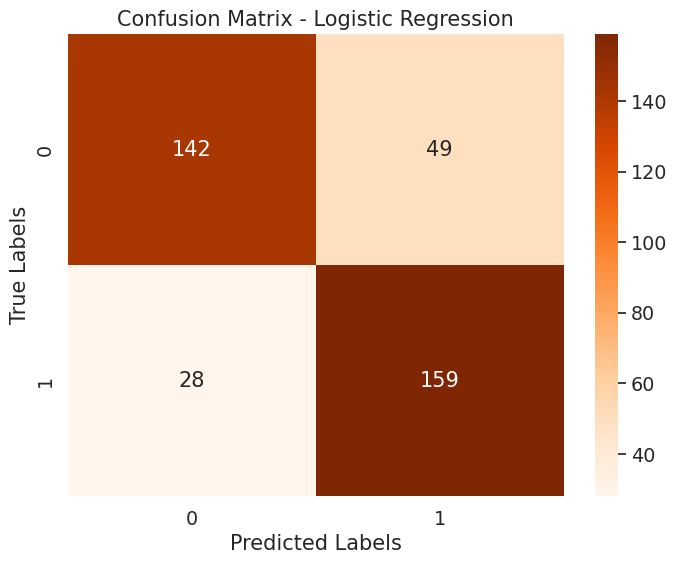

In [41]:
def logisticRegression(X_train, y_train, X_test, y_test):
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)

    y_pred_class = logreg.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred_class)

    cm = confusion_matrix(y_test, y_pred_class)

    return accuracy, cm

accuracy, cm = logisticRegression(X_train, y_train, X_test, y_test)
methodDict['Log. Regres.'] = accuracy * 100
print(f'Logistic Regression Accuracy: {accuracy}')
print()

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Decision Tree Accuracy: 0.753968253968254



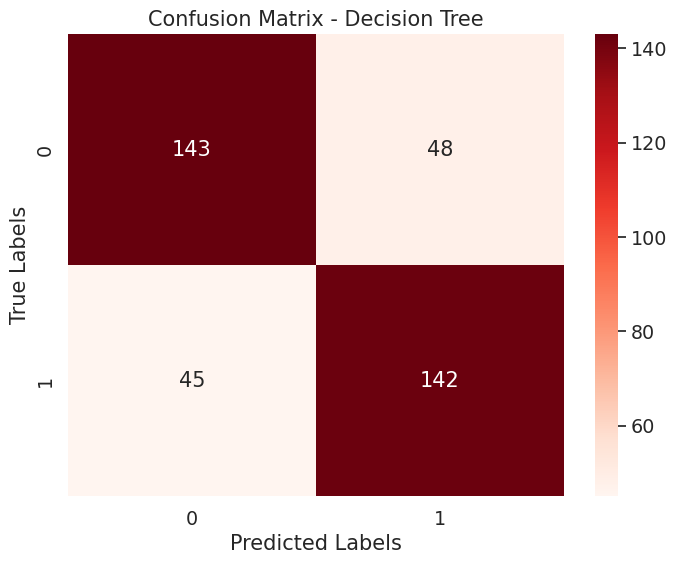

In [42]:
def decisionTree(X_train, y_train, X_test, y_test):
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)

    y_pred_class = dt.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred_class)

    cm = confusion_matrix(y_test, y_pred_class)

    return accuracy, cm

dt_accuracy, cm = decisionTree(X_train, y_train, X_test, y_test)
methodDict['Decision Tree'] = dt_accuracy * 100
print(f'Decision Tree Accuracy: {dt_accuracy}')
print()

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Random Forest Accuracy: 0.8068783068783069



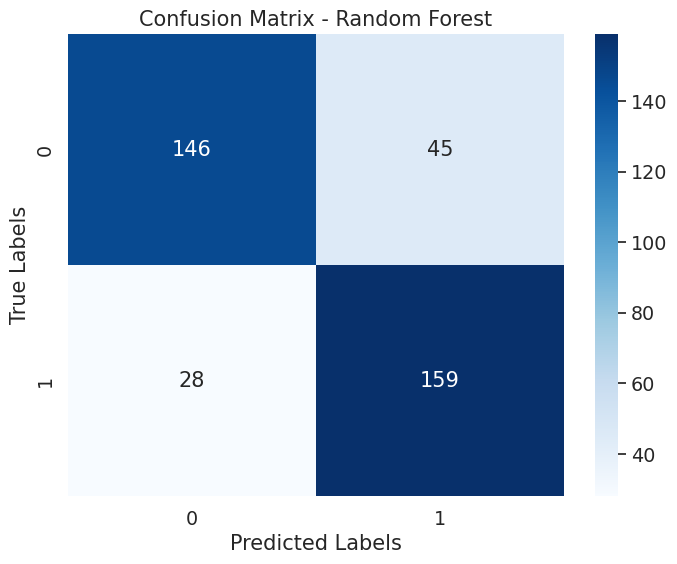

In [43]:
def randomForest(X_train, y_train, X_test, y_test):
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)

    y_pred_class = rf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred_class)

    cm = confusion_matrix(y_test, y_pred_class)

    return accuracy, cm

rf_accuracy, cm = randomForest(X_train, y_train, X_test, y_test)
methodDict['Random Forest'] = rf_accuracy * 100
print(f'Random Forest Accuracy: {rf_accuracy}')
print()

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Support Vector Machines (SVM) Accuracy: 0.8068783068783069



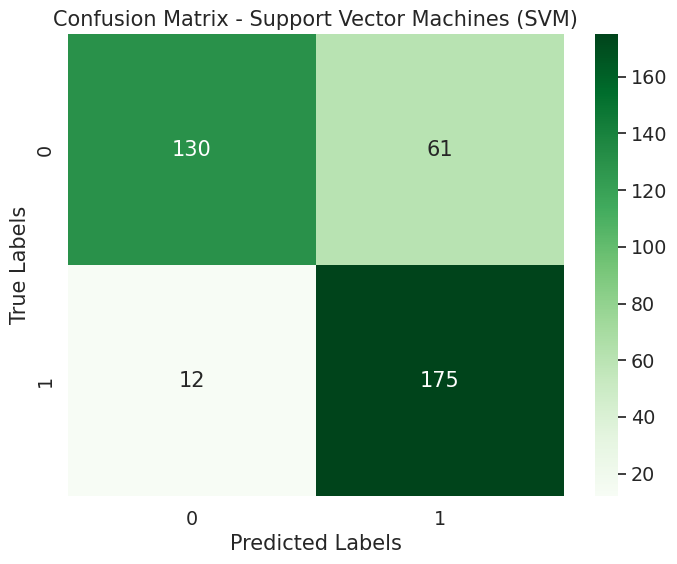

In [44]:
def svm(X_train, y_train, X_test, y_test):
    svm_model = SVC()
    svm_model.fit(X_train, y_train)

    y_pred_class = svm_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred_class)

    cm = confusion_matrix(y_test, y_pred_class)

    return accuracy,cm

accuracy, cm = svm(X_train, y_train, X_test, y_test)
methodDict['SVM'] = accuracy * 100
print(f'Support Vector Machines (SVM) Accuracy: {accuracy}')
print()

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Support Vector Machines (SVM)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Making Predictions

### Using Support Vector Machines (SVM)

In [45]:
model_svm = SVC()

In [46]:
model_svm.fit(X_train, y_train)

SVC()

In [47]:
accuracy = model_svm.score(X_test, y_test)
methodDict['SVM'] = accuracy * 100
print(f'Test set accuracy: {accuracy:.2f}')

Test set accuracy: 0.81


In [48]:
predictions_svm = model_svm.predict(X_train)

results_svm = pd.DataFrame({'index': X_train.index, 'prediction': predictions_svm, 'expected': y_train})
results_svm.head()

,index,prediction,expected
929,929,0,0
901,901,1,1
579,579,1,1
367,367,1,1
615,615,1,1


### Using Random Forest

In [49]:
model_rf = RandomForestClassifier(n_estimators=100)

In [50]:
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
accuracy = model_rf.score(X_test, y_test)
methodDict['Random Forest'] = accuracy * 100
print(f'Test set accuracy: {accuracy:.2f}')

Test set accuracy: 0.81


In [52]:
predictions_rf = model_rf.predict(X_train)

results_rf = pd.DataFrame({'index': X_train.index, 'prediction': predictions_rf, 'expected': y_train})
results_rf.head()

,index,prediction,expected
929,929,0,0
901,901,1,1
579,579,1,1
367,367,1,1
615,615,1,1


## Creating a submission file

For the model using SVM  

In [53]:
clf = SVC()

clf.fit(X_train, y_train)

dfTestPredictions = clf.predict(X_test)

results = pd.DataFrame({'Index': X_test.index, 'Treatment': dfTestPredictions})
results.to_csv('results_svm.csv', index=False)
results.head()

,Index,Treatment
0,5,1
1,494,0
2,52,0
3,984,0
4,186,1


For the model using Random Forest

In [54]:
clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)

dfTestPredictions = clf.predict(X_test)

results = pd.DataFrame({'Index': X_test.index, 'Treatment': dfTestPredictions})
results.to_csv('results_rf.csv', index=False)
results.head()

,Index,Treatment
0,5,1
1,494,0
2,52,0
3,984,0
4,186,0
